In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn import datasets,linear_model, tree
#import plotly.offline as py
from sklearn.preprocessing import scale, StandardScaler
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, classification_report, accuracy_score
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC

In [2]:
os.getcwd()

'C:\\Users\\HP\\Documents'

In [3]:
os.chdir("E:\\Afitech PPML Datasets")

In [4]:
hpcdf=pd.read_csv("hpc_breakdowns.csv")

In [5]:
hpcdf.head()

,Unnamed: 0,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [6]:
hpcdf.tail()

,Unnamed: 0,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
2049275,2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2049276,2075255,26/11/2010,20:59:00,0.944,0.0,240.00,4.0,0.0,0.0,0.0
2049277,2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2049278,2075257,26/11/2010,21:01:00,0.934,0.0,239.70,3.8,0.0,0.0,0.0
2049279,2075258,26/11/2010,21:02:00,0.932,0.0,239.55,3.8,0.0,0.0,0.0


In [7]:
hpcdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2049280 entries, 0 to 2049279
Data columns (total 10 columns):
Unnamed: 0               int64
Date                     object
Time                     object
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtypes: float64(7), int64(1), object(2)
memory usage: 156.3+ MB


In [8]:
hpcdf.describe()

,Unnamed: 0,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.047237e+06,2.048803e+06,2.047249e+06,2.047279e+06,2.047983e+06,2.048070e+06,2.049151e+06
mean,1.031496e+06,1.091655e+00,1.237129e-01,2.408405e+02,4.627869e+00,1.122227e+00,1.298954e+00,6.458394e+00
std,5.964586e+05,1.057290e+00,1.127240e-01,3.238838e+00,4.444695e+00,6.153978e+00,5.823372e+00,8.437150e+00
min,0.000000e+00,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.162538e+05,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.028638e+06,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.545307e+06,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,2.075258e+06,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


# Slicing The Last 2 Lakh Rows

In [9]:
hpcdf.drop(hpcdf.tail(200000).index,inplace=True)

In [10]:
hpcdf.shape

(1849280, 10)

In [11]:
hpcdf.tail()

,Unnamed: 0,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
1849275,1862789,2/7/2010,07:53:00,0.450,0.322,236.90,2.4,0.0,2.0,1.0
1849276,1862790,2/7/2010,07:54:00,0.386,0.216,236.69,1.8,0.0,0.0,0.0
1849277,1862791,2/7/2010,07:55:00,0.378,0.204,236.54,1.8,0.0,0.0,1.0
1849278,1862792,2/7/2010,07:56:00,0.376,0.204,236.15,1.8,0.0,0.0,1.0
1849279,1862793,2/7/2010,07:57:00,0.374,0.202,235.70,1.8,0.0,0.0,0.0


In [12]:
hpcdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1849280 entries, 0 to 1849279
Data columns (total 10 columns):
Unnamed: 0               int64
Date                     object
Time                     object
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtypes: float64(7), int64(1), object(2)
memory usage: 155.2+ MB


In [13]:
hpcdf.corr()

,Unnamed: 0,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Unnamed: 0,1.000000,-0.021192,0.048311,0.278375,-0.026335,-0.007346,-0.034708,0.080740
Global_active_power,-0.021192,1.000000,0.250001,-0.397770,0.998920,0.485627,0.437460,0.634829
Global_reactive_power,0.048311,0.250001,1.000000,-0.116041,0.268457,0.130711,0.140119,0.084316
Voltage,0.278375,-0.397770,-0.116041,1.000000,-0.409553,-0.196699,-0.168990,-0.264535
Global_intensity,-0.026335,0.998920,0.268457,-0.409553,1.000000,0.490148,0.443356,0.622682
Sub_metering_1,-0.007346,0.485627,0.130711,-0.196699,0.490148,1.000000,0.055715,0.104600
Sub_metering_2,-0.034708,0.437460,0.140119,-0.168990,0.443356,0.055715,1.000000,0.080673
Sub_metering_3,0.080740,0.634829,0.084316,-0.264535,0.622682,0.104600,0.080673,1.000000


# Identifying The Outliers

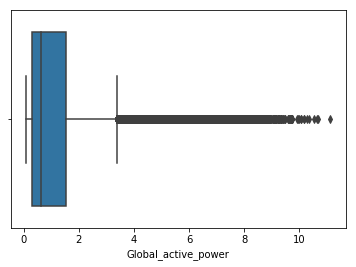

In [14]:
sns.boxplot(x=hpcdf['Global_active_power'],data=hpcdf)

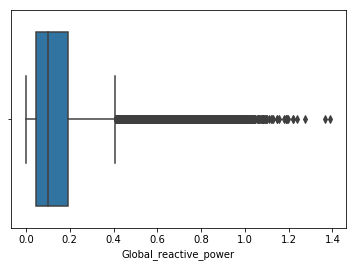

In [15]:
sns.boxplot(x=hpcdf['Global_reactive_power'],data=hpcdf)

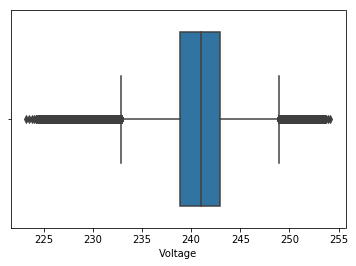

In [16]:
sns.boxplot(x=hpcdf['Voltage'],data=hpcdf)

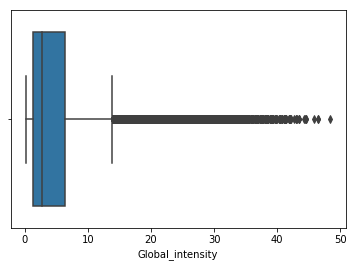

In [17]:
sns.boxplot(x=hpcdf['Global_intensity'],data=hpcdf)

# Checking The Global Intensity

In [18]:
count=0
for item in hpcdf['Global_intensity']:
    if item > 15:
        count=count+1
        
print(count) 

73981


# Missing Value Treatment

In [19]:
hpcdf.isnull().sum()

Unnamed: 0                  0
Date                        0
Time                        0
Global_active_power      1997
Global_reactive_power     439
Voltage                  2004
Global_intensity         1811
Sub_metering_1           1202
Sub_metering_2           1128
Sub_metering_3            129
dtype: int64

In [20]:
print(hpcdf['Global_active_power'].value_counts(dropna=False))

0.218    9245
0.216    9045
0.220    8779
0.222    8614
0.224    8482
0.322    8438
0.318    8356
0.320    8346
0.324    8329
0.312    8304
0.316    8303
0.226    8189
0.314    8184
0.326    8089
0.308    8000
0.214    7982
0.310    7912
0.228    7887
0.306    7750
0.328    7516
0.230    7420
0.304    7297
0.234    7211
0.252    7186
0.250    7154
0.330    7151
0.232    7139
0.302    7021
0.236    6977
0.300    6930
         ... 
8.242       1
8.024       1
7.292       1
8.258       1
7.406       1
7.446       1
8.492       1
8.114       1
9.088       1
7.216       1
8.320       1
9.714       1
8.192       1
8.570       1
8.680       1
8.636       1
9.482       1
8.796       1
9.224       1
7.792       1
8.112       1
7.964       1
8.760       1
7.310       1
9.292       1
7.536       1
7.260       1
9.732       1
8.932       1
8.444       1
Name: Global_active_power, Length: 4181, dtype: int64


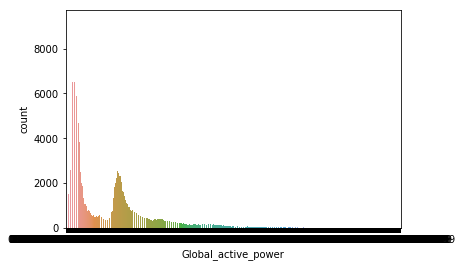

In [21]:
sns.countplot(x="Global_active_power",data=hpcdf)
plt.show()

In [22]:
Global_active_power_Null=hpcdf[hpcdf['Global_active_power'].isnull()].index.tolist()
print(Global_active_power_Null)

[7944, 7945, 7946, 7947, 7948, 7949, 7950, 7951, 7952, 7953, 7954, 7955, 7956, 7957, 7958, 7959, 7960, 7961, 7962, 7963, 7964, 7965, 7966, 7967, 7968, 7969, 7970, 7971, 7972, 29481, 29482, 29483, 29484, 29485, 29486, 29487, 29488, 29489, 29490, 29491, 29492, 29493, 29494, 29495, 29496, 29497, 29498, 29499, 29500, 29501, 29502, 29503, 29504, 29505, 29506, 29507, 64740, 64741, 64742, 64743, 64744, 64745, 64746, 64747, 64748, 64749, 64750, 64751, 64752, 64753, 64754, 64755, 64756, 64757, 64758, 64759, 64760, 64761, 64762, 64763, 64764, 64765, 64766, 64767, 64768, 64769, 64770, 64771, 64772, 64773, 64774, 64775, 64776, 64777, 64778, 64779, 64780, 64781, 64782, 64783, 64784, 64785, 64786, 114187, 114188, 114189, 114190, 114191, 114192, 114193, 114194, 114195, 114196, 114197, 114198, 114199, 114200, 114201, 114202, 114203, 114204, 114205, 114206, 114207, 114208, 114209, 114210, 114211, 114212, 114213, 114214, 114215, 114216, 114217, 114218, 114219, 114220, 114221, 114222, 114223, 114224, 114

In [23]:
Global_active_powerMedian=hpcdf['Global_active_power'].median()
print(Global_active_powerMedian)

0.62


In [24]:
hpcdf['Global_active_power'].iloc[Global_active_power_Null]=Global_active_powerMedian

C:\python\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [25]:
Global_active_power_Null=hpcdf[hpcdf['Global_active_power'].isnull()].index.tolist()
print(Global_active_power_Null)

[]


In [26]:
print(hpcdf['Global_reactive_power'].value_counts(dropna=False))

0.000    444686
0.100     20106
0.098     20047
0.096     20033
0.102     19972
0.092     19686
0.104     19652
0.094     19514
0.106     19351
0.090     19155
0.088     19049
0.108     18725
0.086     18669
0.110     18389
0.084     18347
0.078     18059
0.082     18038
0.080     17666
0.076     17613
0.112     17146
0.048     16908
0.050     16906
0.114     16801
0.072     16788
0.074     16760
0.052     16617
0.046     16519
0.070     16508
0.054     16288
0.116     16168
          ...  
1.274         1
0.996         1
1.038         1
1.030         1
1.192         1
1.016         1
1.018         1
1.036         1
1.088         1
1.074         1
1.048         1
1.240         1
1.118         1
1.000         1
1.218         1
0.950         1
1.054         1
0.980         1
1.020         1
1.090         1
1.092         1
1.124         1
1.084         1
1.198         1
1.064         1
1.186         1
0.952         1
1.180         1
1.044         1
0.976         1
Name: Global_reactive_po

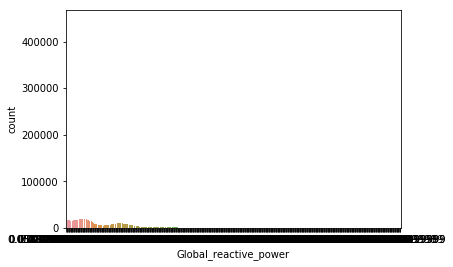

In [27]:
sns.countplot(x="Global_reactive_power",data=hpcdf)
plt.show()

In [28]:
Global_reactive_power_Null=hpcdf[hpcdf['Global_reactive_power'].isnull()].index.tolist()
print(Global_reactive_power_Null)

[251237, 251238, 251239, 251240, 251241, 251242, 251243, 251244, 251245, 251246, 251247, 251248, 251249, 251250, 251251, 251252, 251253, 251254, 251255, 251256, 251257, 251258, 251259, 251260, 251261, 251262, 251263, 251264, 251265, 251266, 251267, 251268, 251269, 251270, 251271, 251272, 251273, 251274, 251275, 251276, 266921, 266922, 266923, 266924, 266925, 266926, 266927, 266928, 266929, 266930, 266931, 266932, 266933, 266934, 266935, 266936, 266937, 266938, 266939, 266940, 266941, 266942, 266943, 266944, 266945, 266946, 266947, 266948, 266949, 266950, 266951, 266952, 266953, 266954, 266955, 286205, 286206, 286207, 286208, 286209, 286210, 286211, 286212, 286213, 286214, 286215, 286216, 286217, 286218, 286219, 286220, 286221, 286222, 286223, 286224, 286225, 286226, 286227, 286228, 286229, 286230, 286231, 286232, 286233, 286234, 286235, 286236, 286237, 286238, 286239, 286240, 286241, 286242, 286243, 286244, 286245, 286246, 286247, 286248, 286249, 286250, 286251, 286252, 286253, 286254,

In [29]:
hpcdf['Global_reactive_power'].iloc[Global_reactive_power_Null]="0.000"
Global_reactive_power_Null=hpcdf[hpcdf["Global_reactive_power"].isnull()].index.tolist()
print(Global_reactive_power_Null)

C:\python\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


[]


In [30]:
print(hpcdf['Voltage'].value_counts(dropna=False))

241.18    3176
241.02    2884
241.12    2873
241.53    2870
241.35    2868
240.97    2853
241.22    2850
241.50    2834
241.29    2831
240.78    2822
240.95    2822
241.15    2822
241.27    2822
241.32    2820
241.38    2820
241.13    2819
241.42    2817
240.86    2816
241.31    2814
240.73    2813
241.71    2813
241.09    2811
240.76    2807
241.41    2807
240.59    2806
241.03    2806
240.90    2805
241.19    2803
240.67    2801
241.40    2796
          ... 
225.65       1
224.86       1
227.14       1
225.61       1
252.97       1
252.72       1
253.53       1
251.97       1
225.02       1
224.77       1
224.48       1
253.00       1
253.75       1
228.27       1
225.97       1
225.78       1
225.47       1
224.97       1
253.24       1
252.51       1
252.76       1
253.51       1
226.01       1
224.76       1
225.26       1
224.74       1
224.24       1
223.99       1
223.49       1
223.85       1
Name: Voltage, Length: 2835, dtype: int64


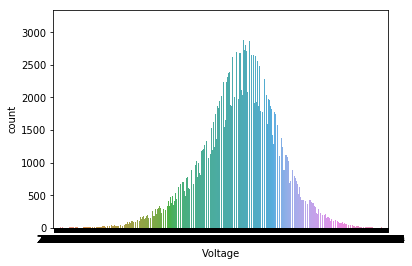

In [31]:
sns.countplot(x="Voltage",data=hpcdf)
plt.show()

In [32]:
Voltage_Null=hpcdf[hpcdf["Voltage"].isnull()].index.tolist()
print(Voltage_Null)

[37780, 37781, 37782, 37783, 37784, 37785, 37786, 37787, 37788, 37789, 37790, 37791, 37792, 37793, 37794, 37795, 37796, 37797, 37798, 37799, 37800, 37801, 37802, 37803, 37804, 37805, 37806, 37807, 37808, 37809, 37810, 37811, 37812, 101184, 101185, 101186, 101187, 101188, 101189, 101190, 101191, 101192, 101193, 101194, 101195, 101196, 101197, 101198, 101199, 101200, 101201, 101202, 101203, 101204, 101205, 101206, 101207, 101208, 101209, 101210, 101211, 101212, 101213, 101214, 101215, 101216, 101217, 101218, 101219, 101220, 101221, 101222, 101223, 101224, 101225, 101226, 101227, 126272, 126273, 126274, 126275, 126276, 126277, 126278, 126279, 126280, 126281, 126282, 126283, 126284, 126285, 126286, 126287, 126288, 126289, 126290, 126291, 126292, 126293, 126294, 126295, 126296, 126297, 126298, 126299, 126300, 126301, 126302, 126303, 126304, 126305, 126306, 126307, 126308, 126309, 126310, 126311, 126312, 126313, 126314, 126315, 126316, 126317, 126318, 126319, 126320, 126321, 126322, 126323, 

In [33]:
VoltageMean=hpcdf['Voltage'].mean()
print(VoltageMean)

240.80082135531356


In [34]:
hpcdf['Voltage'].iloc[Voltage_Null]=VoltageMean

C:\python\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [35]:
Voltage_Null=hpcdf[hpcdf["Voltage"].isnull()].index.tolist()
print(Voltage_Null)

[]


In [36]:
print(hpcdf['Global_intensity'].value_counts(dropna=False))

1.0     154372
1.4     150368
1.2     123211
1.6     101474
1.8      85680
0.8      77463
2.0      63651
5.6      58185
5.8      57226
6.0      48389
5.4      48165
2.2      43416
0.6      41814
6.2      39698
2.4      35387
5.2      33887
6.4      31377
6.6      26558
2.6      23846
6.8      22714
2.8      20813
7.0      20586
7.2      19220
7.4      16587
3.0      15749
5.0      15716
7.6      15315
3.2      14932
7.8      14095
3.6      13065
         ...  
37.6         7
38.4         6
39.0         5
41.2         5
37.0         5
38.8         5
36.6         4
40.8         4
39.2         4
39.8         4
40.4         4
41.8         3
41.4         3
38.6         3
43.4         3
41.0         3
39.6         2
43.0         2
40.2         2
44.6         2
46.4         2
40.0         1
45.8         1
44.2         1
44.4         1
42.2         1
43.2         1
42.6         1
40.6         1
48.4         1
Name: Global_intensity, Length: 221, dtype: int64


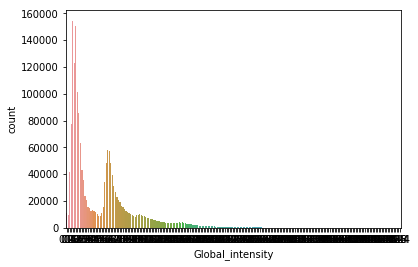

In [37]:
sns.countplot(x="Global_intensity",data=hpcdf)
plt.show()

In [38]:
Global_intensity_Null=hpcdf[hpcdf["Global_intensity"].isnull()].index.tolist()
print(Global_intensity_Null)

[7725, 7726, 7727, 7728, 7729, 7730, 7731, 7732, 7733, 7734, 7735, 7736, 7737, 7738, 7739, 7740, 7741, 7742, 7743, 7744, 7745, 7746, 7747, 7748, 7749, 7750, 7751, 7752, 7753, 7754, 7755, 7756, 7757, 7758, 7759, 7760, 7761, 7762, 7763, 7764, 7765, 7766, 7767, 7768, 7769, 7770, 7771, 7772, 7773, 7774, 7775, 7776, 7777, 14229, 14230, 14231, 14232, 14233, 14234, 14235, 14236, 14237, 14238, 14239, 14240, 14241, 14242, 14243, 14244, 14245, 14246, 14247, 14248, 14249, 14250, 14251, 14252, 14253, 14254, 14255, 14256, 14257, 14258, 14259, 14260, 14261, 14262, 14263, 14264, 14265, 14266, 14267, 14268, 14269, 14270, 14271, 14272, 14273, 14274, 14275, 14276, 14277, 14278, 14279, 14280, 14281, 14282, 38637, 38638, 38639, 38640, 38641, 38642, 38643, 38644, 38645, 38646, 38647, 38648, 38649, 38650, 38651, 38652, 38653, 38654, 38655, 38656, 38657, 83197, 83198, 83199, 83200, 83201, 83202, 83203, 83204, 83205, 83206, 83207, 83208, 83209, 83210, 83211, 83212, 83213, 83214, 83215, 83216, 83217, 83218, 83

In [39]:
Global_intensityMedian=hpcdf['Global_intensity'].median()
print(Global_intensityMedian)

2.8


In [40]:
hpcdf['Global_intensity'].iloc[Global_intensity_Null]=Global_intensityMedian

C:\python\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [41]:
Global_intensityMedian=hpcdf['Global_intensity'].median()
print(Global_intensityMedian)

2.8


In [42]:
print(hpcdf['Sub_metering_1'].value_counts(dropna=False))

 0.0     1692593
 1.0       77792
 2.0       17553
 38.0      15273
 37.0      13858
 39.0       6293
 36.0       4977
 35.0       1288
NaN         1202
 40.0       1139
 32.0        674
 33.0        555
 14.0        527
 10.0        517
 34.0        510
 12.0        508
 31.0        501
 15.0        493
 18.0        487
 13.0        479
 17.0        474
 16.0        474
 11.0        474
 3.0         470
 9.0         469
 27.0        463
 21.0        443
 8.0         438
 20.0        438
 4.0         430
          ...   
 72.0         45
 55.0         42
 71.0         41
 54.0         37
 77.0         34
 56.0         32
 78.0         32
 70.0         28
 79.0         27
 60.0         24
 67.0         16
 68.0         16
 80.0         15
 59.0         13
 58.0         13
 66.0         12
 65.0         12
 63.0         12
 62.0         12
 57.0         12
 61.0         10
 64.0          9
 69.0          9
 81.0          5
 83.0          4
 82.0          3
 87.0          3
 88.0         

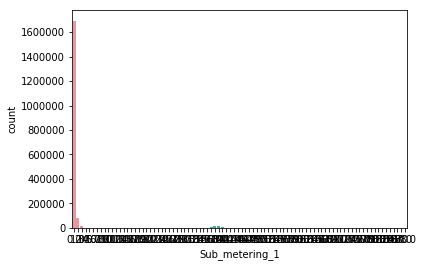

In [43]:
sns.countplot(x="Sub_metering_1",data=hpcdf)
plt.show()

In [44]:
Sub_metering_1_Null=hpcdf[hpcdf["Sub_metering_1"].isnull()].index.tolist()
print(Sub_metering_1_Null)

[6947, 6948, 6949, 6950, 6951, 6952, 6953, 6954, 6955, 6956, 6957, 6958, 6959, 6960, 6961, 6962, 6963, 6964, 6965, 6966, 6967, 6968, 6969, 6970, 6971, 6972, 6973, 6974, 6975, 6976, 6977, 6978, 6979, 6980, 6981, 6982, 6983, 6984, 6985, 20724, 20725, 20726, 20727, 20728, 20729, 20730, 20731, 20732, 20733, 20734, 20735, 20736, 20737, 20738, 20739, 20740, 20741, 20742, 20743, 20744, 20745, 20746, 20747, 20748, 20749, 20750, 20751, 20752, 20753, 20754, 20755, 20756, 20757, 20758, 20759, 20760, 20761, 20762, 20763, 20764, 20765, 25225, 25226, 25227, 25228, 25229, 25230, 25231, 25232, 25233, 25234, 25235, 25236, 25237, 25238, 25239, 25240, 25241, 25242, 25243, 25244, 25245, 25246, 25247, 25248, 25249, 25250, 25251, 38261, 38262, 38263, 38264, 38265, 38266, 38267, 38268, 38269, 38270, 38271, 38272, 38273, 38274, 38275, 44950, 44951, 44952, 44953, 44954, 44955, 44956, 44957, 44958, 44959, 44960, 44961, 44962, 44963, 44964, 44965, 44966, 44967, 44968, 44969, 44970, 44971, 44972, 44973, 44974, 44

In [45]:
hpcdf['Sub_metering_1'].iloc[Sub_metering_1_Null]="0.0"

C:\python\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [46]:
Sub_metering_1_Null=hpcdf[hpcdf["Sub_metering_1"].isnull()].index.tolist()
print(Sub_metering_1_Null)

[]


In [47]:
print(hpcdf['Sub_metering_2'].value_counts(dropna=False))

 0.0     1313608
 1.0      323854
 2.0      137634
 3.0        6821
 37.0       6416
 4.0        5461
 36.0       5339
 38.0       4832
 5.0        4052
 35.0       2905
 39.0       2218
 28.0       1725
 29.0       1639
 27.0       1549
 34.0       1548
 18.0       1455
 26.0       1386
 6.0        1349
 30.0       1330
 23.0       1315
 25.0       1305
 19.0       1300
 17.0       1279
 24.0       1269
 21.0       1255
 22.0       1232
 20.0       1205
 31.0       1180
NaN         1128
 32.0       1107
          ...   
 64.0         93
 68.0         93
 67.0         89
 66.0         83
 76.0         80
 65.0         77
 43.0         73
 62.0         70
 60.0         67
 59.0         64
 57.0         63
 61.0         61
 44.0         55
 52.0         47
 48.0         47
 54.0         46
 46.0         46
 58.0         46
 56.0         45
 51.0         45
 55.0         44
 53.0         43
 47.0         41
 45.0         41
 49.0         31
 50.0         30
 77.0         24
 79.0         

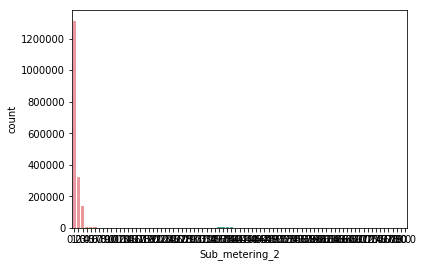

In [48]:
sns.countplot(x="Sub_metering_2",data=hpcdf)
plt.show()

In [49]:
Sub_metering_2_Null=hpcdf[hpcdf["Sub_metering_2"].isnull()].index.tolist()
print(Sub_metering_2_Null)

[203049, 203050, 203051, 203052, 203053, 203054, 203055, 203056, 203057, 203058, 203059, 203060, 203061, 203062, 203063, 203064, 203065, 203066, 203067, 203068, 203069, 203070, 203071, 203072, 203073, 203074, 203075, 203076, 203077, 203078, 203079, 203080, 203081, 203082, 203083, 282650, 282651, 282652, 282653, 282654, 282655, 282656, 282657, 282658, 282659, 282660, 282661, 282662, 282663, 282664, 282665, 282666, 282667, 282668, 282669, 282670, 282671, 282672, 282673, 282674, 282675, 297115, 297116, 297117, 297118, 297119, 297120, 297121, 297122, 297123, 297124, 297125, 297126, 297127, 297128, 297129, 297130, 297131, 297132, 297133, 297134, 297135, 297136, 298124, 298125, 298126, 298127, 298128, 298129, 298130, 298131, 298132, 298133, 298134, 298135, 298136, 298137, 298138, 444240, 444241, 444242, 444243, 444244, 444245, 444246, 444247, 444248, 444249, 444250, 444251, 444252, 444253, 444254, 444255, 444256, 444257, 444258, 558285, 558286, 558287, 558288, 558289, 558290, 558291, 558292,

In [50]:
hpcdf['Sub_metering_2'].iloc[Sub_metering_2_Null]="0.0"

C:\python\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [51]:
Sub_metering_2_Null=hpcdf[hpcdf["Sub_metering_2"].isnull()].index.tolist()
print(Sub_metering_2_Null)

[]


In [52]:
print(hpcdf['Sub_metering_3'].value_counts(dropna=False))

 0.0     794692
 1.0     391805
 18.0    325119
 17.0    150931
 19.0    108240
 16.0     15349
 12.0     12222
 11.0      9297
 29.0      5585
 20.0      4129
 28.0      3941
 13.0      3740
 10.0      2838
 30.0      2152
 9.0       1678
 6.0       1663
 2.0       1643
 7.0       1618
 3.0       1612
 4.0       1597
 8.0       1595
 5.0       1559
 27.0      1190
 26.0       675
 23.0       626
 21.0       625
 25.0       596
 22.0       594
 15.0       585
 24.0       579
 14.0       474
 31.0       202
NaN         129
Name: Sub_metering_3, dtype: int64


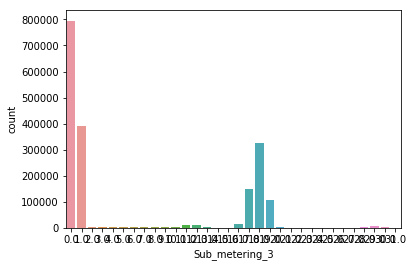

In [53]:
sns.countplot(x="Sub_metering_3",data=hpcdf)
plt.show()

In [54]:
Sub_metering_3_Null=hpcdf[hpcdf["Sub_metering_3"].isnull()].index.tolist()
print(Sub_metering_3_Null)

[301662, 301663, 301664, 301665, 301666, 301667, 301668, 301669, 301670, 301671, 301672, 359814, 359815, 359816, 359817, 359818, 359819, 359820, 359821, 359822, 359823, 359824, 359825, 359826, 671900, 671901, 671902, 671903, 671904, 671905, 671906, 671907, 671908, 671909, 671910, 671911, 671912, 671913, 671914, 671915, 671916, 671917, 671918, 671919, 671920, 671921, 671922, 671923, 671924, 671925, 671926, 671927, 671928, 671929, 671930, 671931, 671932, 671933, 671934, 671935, 671936, 671937, 671938, 671939, 671940, 671941, 671942, 671943, 671944, 671945, 671946, 671947, 671948, 671949, 671950, 671951, 671952, 671953, 671954, 671955, 671956, 1824557, 1824558, 1824559, 1824560, 1824561, 1824562, 1824563, 1824564, 1824565, 1824566, 1824567, 1824568, 1824569, 1824570, 1824571, 1824572, 1824573, 1824574, 1824575, 1824576, 1824577, 1824578, 1824579, 1824580, 1824581, 1824582, 1824583, 1824584, 1824585, 1824586, 1824587, 1824588, 1824589, 1824590, 1824591, 1824592, 1824593, 1824594, 1824595, 

In [55]:
hpcdf['Sub_metering_3'].iloc[Sub_metering_3_Null]="0.0"

C:\python\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [56]:
Sub_metering_3_Null=hpcdf[hpcdf["Sub_metering_3"].isnull()].index.tolist()
print(Sub_metering_3_Null)

[]


In [57]:
hpcdf.isnull().sum()

Unnamed: 0               0
Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [58]:
hpcdf.head()

,Unnamed: 0,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0,1,17
1,1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0,1,16
2,2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0,2,17
3,3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0,1,17
4,4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0,1,17


# Dropping The Unnecessary Columns

In [59]:
df=hpcdf.drop(['Sub_metering_3','Sub_metering_2','Sub_metering_1','Unnamed: 0','Date','Time'],axis=1)
df

,Global_active_power,Global_reactive_power,Voltage,Global_intensity
0,4.216,0.418,234.84,18.4
1,5.360,0.436,233.63,23.0
2,5.374,0.498,233.29,23.0
3,5.388,0.502,233.74,23.0
4,3.666,0.528,235.68,15.8
5,3.520,0.522,235.02,15.0
6,3.702,0.52,235.09,15.8
7,3.700,0.52,235.22,15.8
8,3.668,0.51,233.99,15.8
9,3.662,0.51,233.86,15.8


# Scaling

In [60]:
from sklearn.preprocessing import scale
colnames=["Global_active_power","Global_reactive_power","Voltage","Global_intensity"]
df_scaled=scale(df[colnames])

In [61]:
df_scaled=pd.DataFrame(df_scaled,columns=colnames)
print(df_scaled)

         Global_active_power  Global_reactive_power   Voltage  \
0                   2.892773               2.631722 -1.815294   
1                   3.957880               2.792062 -2.183784   
2                   3.970914               3.344344 -2.287327   
3                   3.983949               3.379975 -2.150285   
4                   2.380702               3.611577 -1.559482   
5                   2.244770               3.558130 -1.760477   
6                   2.414219               3.540315 -1.739160   
7                   2.412357               3.540315 -1.699570   
8                   2.382564               3.451237 -2.074151   
9                   2.376978               3.451237 -2.113741   
10                  3.108773               3.344344 -2.418278   
11                  4.006293               3.094926 -2.442641   
12                  3.831258               3.166188 -2.378688   
13                  3.872224               2.453566 -2.403051   
14                  2.741

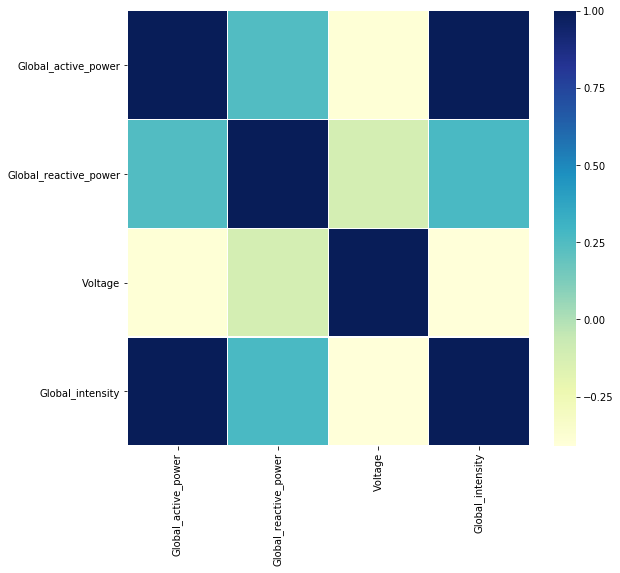

In [62]:
corrmat = df_scaled.corr() 
  
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1) 

In [63]:
count=0
for item in df_scaled['Global_intensity']:
    if item > 15:
        count=count+1
        
print(count) 

0


# Dropping NA 

In [64]:
df_scaled.dropna()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity
0,2.892773,2.631722,-1.815294,3.033820
1,3.957880,2.792062,-2.183784,4.052449
2,3.970914,3.344344,-2.287327,4.052449
3,3.983949,3.379975,-2.150285,4.052449
4,2.380702,3.611577,-1.559482,2.458073
5,2.244770,3.558130,-1.760477,2.280920
6,2.414219,3.540315,-1.739160,2.458073
7,2.412357,3.540315,-1.699570,2.458073
8,2.382564,3.451237,-2.074151,2.458073
9,2.376978,3.451237,-2.113741,2.458073


In [65]:
df_scaled.shape

(1849280, 4)

In [66]:
df_scaled[:] = np.nan_to_num(df)

In [67]:
X=df[["Global_active_power","Global_reactive_power","Voltage"]]
y=df['Global_intensity']

In [68]:
np.isnan(y).sum()

0

# Developing The Machine Learning Model

In [69]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [70]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.30, random_state=26)

In [71]:
lr_mod=LinearRegression()
lr_mod.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [72]:
y_pred=lr_mod.predict(X_test)

In [73]:
X_test

,Global_active_power,Global_reactive_power,Voltage
670764,0.338,0.098,246.17
294928,0.230,0.122,242.18
1845411,0.186,0,244.14
1720168,1.518,0,243.29
238222,3.814,0.37,231.35
1025554,0.958,0.216,241.77
641874,0.336,0.1,241.78
680694,0.368,0.184,242.59
1661106,0.264,0.056,245.40
1657646,4.844,0.056,233.58


In [74]:
y_test

670764      1.4
294928      1.0
1845411     1.0
1720168     6.2
238222     16.4
1025554     4.0
641874      1.4
680694      1.6
1661106     1.0
1657646    20.6
802797      5.8
1383784     1.0
773037      1.4
1220789     1.6
1153460     7.2
213331      5.6
216943      1.8
523035      0.8
1258050     5.8
592831      1.2
354616      1.0
250210      1.0
752891      1.8
1684419    15.2
847714      2.0
635710      5.2
1130591     3.4
1406355     2.2
625576      0.8
1237010    13.2
           ... 
1548284     2.8
1425330     7.4
1021190     7.8
572956      6.6
843459      1.6
856551      1.4
1699228     4.8
707912     10.8
1717693     6.2
565194      7.0
1825661     4.8
375270      0.8
273057      9.0
428723      1.4
6940       10.0
504345      2.4
199463      7.0
1624574     9.6
841115      0.6
137098      8.2
1379038     1.0
1406120     4.0
1054091     8.2
1725564     5.6
548099      1.0
220964      1.2
634462      2.0
1707008     7.0
1676027     1.0
568216      1.4
Name: Global_intensity, 

In [75]:
y_pred

array([1.37315768, 1.02448957, 0.7039942 , ..., 7.06456041, 0.97948331,
       1.33988658])

In [76]:
cutoff = 0.7                              # decide on a cutoff limit
y_pred_classes = np.zeros_like(y_pred)    # initialise a matrix full with zeros
y_pred_classes[y_pred > cutoff] = 1  

In [77]:
y_test_classes = np.zeros_like(y_pred)
y_test_classes[y_test > cutoff] = 1

In [78]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test_classes, y_pred_classes))
print(classification_report(y_test_classes, y_pred_classes))

[[ 18329    410]
 [  1596 534449]]
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95     18739
         1.0       1.00      1.00      1.00    536045

    accuracy                           1.00    554784
   macro avg       0.96      0.99      0.97    554784
weighted avg       1.00      1.00      1.00    554784



# Accuracy

In [79]:
from sklearn import metrics

In [80]:
print("Accuracy:",metrics.accuracy_score(y_test_classes,y_pred_classes))

Accuracy: 0.9963841783468882


In [81]:
lr_mod.score(X_train,y_train)

0.995989674822116

# Mean Squared Error

In [82]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [83]:
rms=sqrt(mean_squared_error(y_test,y_pred))

In [84]:
rms

0.2716012196295378